In [1]:
import re
import codecs
import glob
import csv
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import math
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
%autosave 5

Autosaving every 5 seconds


# Create a Summary Dashboard of the stories run & combinations of stories and perspectives

#### i. import data_dict

In [2]:
filename = '/Users/alexreblando/Documents/GitHub/data_analysis_ebs/online_experiment/analysis/parsing_log_file/pickle/data_dict_pilots_b1_b2_b3_b4.p'
data_dict = pickle.load( open( filename, "rb" ) )

## I. Distribution of Stories

### A. List the stories

In [3]:
stories = []

for key in data_dict:
    stories.append(data_dict[key]['story'].iloc[0])

### B. Count the stories

In [4]:
all_stories = [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44]
story_count = []

for i in all_stories:
    story_count.append(stories.count(i))

### C. Plot the distribution

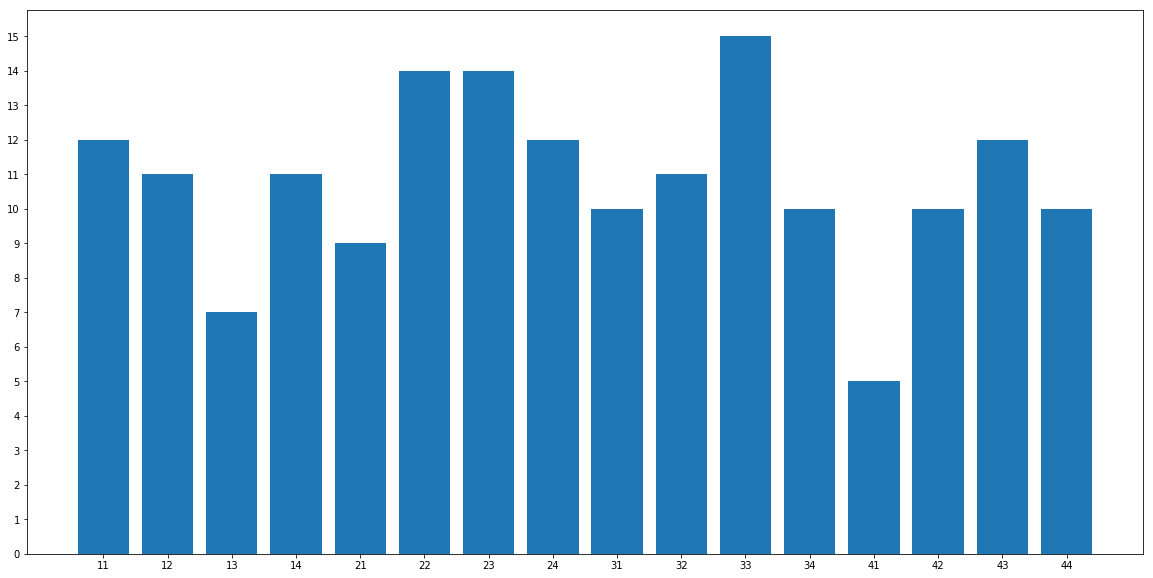

In [5]:
plt.figure(figsize=(20,10))
yint = range(0, math.ceil(max(story_count))+1)
x = np.arange(16)
plt.bar(x, story_count)
plt.yticks(yint)
_ = plt.xticks(x, all_stories)

## II. Distribution of the Combinations of Stories and Perspectives

### A. Finding the distribution of combinations

In [6]:
comb_distr = np.zeros((3, 16))

for key in data_dict:
    this_story = data_dict[key]['story'].iloc[0]
    this_type = data_dict[key]['p_type'].iloc[0]
    if this_story == 11:
        if this_type == 0:
            comb_distr[0,0] += 1
        if this_type == 1:
            comb_distr[1,0] += 1
        if this_type == 2:
            comb_distr[2,0] += 1
    if this_story == 12:
        if this_type == 0:
            comb_distr[0,1] += 1
        if this_type == 1:
            comb_distr[1,1] += 1
        if this_type == 2:
            comb_distr[2,1] += 1
    if this_story == 13:
        if this_type == 0:
            comb_distr[0,2] += 1
        if this_type == 1:
            comb_distr[1,2] += 1
        if this_type == 2:
            comb_distr[2,2] += 1
    if this_story == 14:
        if this_type == 0:
            comb_distr[0,3] += 1
        if this_type == 1:
            comb_distr[1,3] += 1
        if this_type == 2:
            comb_distr[2,3] += 1
    if this_story == 21:
        if this_type == 0:
            comb_distr[0,4] += 1
        if this_type == 1:
            comb_distr[1,4] += 1
        if this_type == 2:
            comb_distr[2,4] += 1
    if this_story == 22:
        if this_type == 0:
            comb_distr[0,5] += 1
        if this_type == 1:
            comb_distr[1,5] += 1
        if this_type == 2:
            comb_distr[2,5] += 1
    if this_story == 23:
        if this_type == 0:
            comb_distr[0,6] += 1
        if this_type == 1:
            comb_distr[1,6] += 1
        if this_type == 2:
            comb_distr[2,6] += 1
    if this_story == 24:
        if this_type == 0:
            comb_distr[0,7] += 1
        if this_type == 1:
            comb_distr[1,7] += 1
        if this_type == 2:
            comb_distr[2,7] += 1
    if this_story == 31:
        if this_type == 0:
            comb_distr[0,8] += 1
        if this_type == 1:
            comb_distr[1,8] += 1
        if this_type == 2:
            comb_distr[2,8] += 1
    if this_story == 32:
        if this_type == 0:
            comb_distr[0,9] += 1
        if this_type == 1:
            comb_distr[1,9] += 1
        if this_type == 2:
            comb_distr[2,9] += 1
    if this_story == 33:
        if this_type == 0:
            comb_distr[0,10] += 1
        if this_type == 1:
            comb_distr[1,10] += 1
        if this_type == 2:
            comb_distr[2,10] += 1
    if this_story == 34:
        if this_type == 0:
            comb_distr[0,11] += 1
        if this_type == 1:
            comb_distr[1,11] += 1
        if this_type == 2:
            comb_distr[2,11] += 1
    if this_story == 41:
        if this_type == 0:
            comb_distr[0,12] += 1
        if this_type == 1:
            comb_distr[1,12] += 1
        if this_type == 2:
            comb_distr[2,12] += 1
    if this_story == 42:
        if this_type == 0:
            comb_distr[0,13] += 1
        if this_type == 1:
            comb_distr[1,13] += 1
        if this_type == 2:
            comb_distr[2,13] += 1
    if this_story == 43:
        if this_type == 0:
            comb_distr[0,14] += 1
        if this_type == 1:
            comb_distr[1,14] += 1
        if this_type == 2:
            comb_distr[2,14] += 1
    if this_story == 44:
        if this_type == 0:
            comb_distr[0,15] += 1
        if this_type == 1:
            comb_distr[1,15] += 1
        if this_type == 2:
            comb_distr[2,15] += 1
            

### B. Plotting the Distribution of Combinations: heatmap

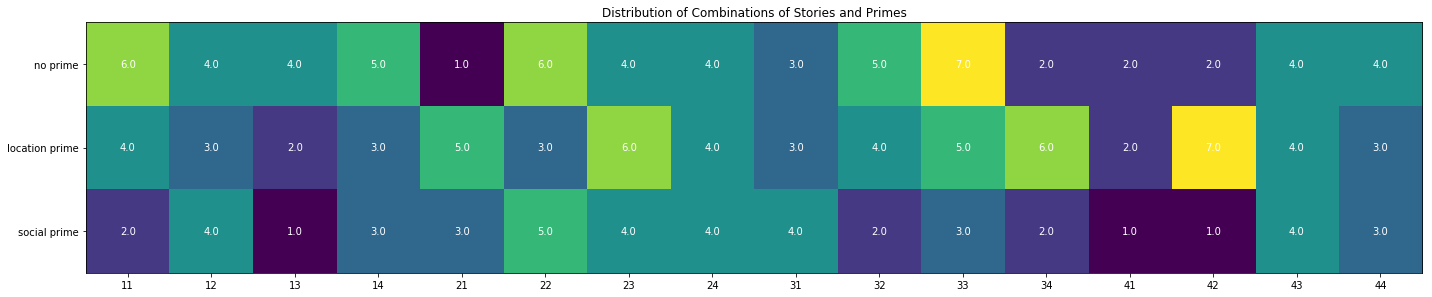

In [15]:

fig, ax = plt.subplots(figsize=(20, 10))
im = ax.imshow(comb_distr)


# We want to show all ticks...
ax.set_xticks(np.arange(len(all_stories)))
ax.set_yticks(np.arange(3))
# ... and label them with the respective list entries
_ = ax.set_xticklabels(all_stories)
_ = ax.set_yticklabels(['no prime', 'location prime', 'social prime'])

# Loop over data dimensions and create text annotations.
for i in range(3):
    for j in range(len(all_stories)):
        text = ax.text(j, i, comb_distr[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Distribution of Combinations of Stories and Primes")
fig.tight_layout()
fig.savefig('distr.png')


